# Dataset: libros en goodreads
Link: https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks
1. Cómo analizar dataframes
2. Overview de los datos
3. Obtener las medidas centrales
4. Analizar graficas

In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
except:
    exit (1)

try:
    from statsmodels import robust
    import wquantiles
except ModuleNotFoundError:
    !pip install statmodels
    !pip install wquantiles
    exit (1)

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import seaborn as sns
import matplotlib.pyplot as plt

db = pd.read_csv ("/content/drive/MyDrive/UNAB/Fundamentos de Ciencia de Datos/books.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Medidas Centrales

In [ ]:
# Info
db.head (5)
db.tail (4)
print (db.sample (10))

db.columns

db.info ()
db.describe ()

# El dataset cuenta con 12 columnas, entre ellas: el id, el título, el autor, su nota media, etc.
# Las columnas cualitativas son: título, autores, idioma, fecha de publicación, editorial
# Las columnas cuantitativas son: id, puntuación, isbn, isbn13, número de págs, número de puntuaciones, número de reviews.
# Ninguna columna tiene valores nan.

       bookID                                              title  \
3520    12829                            The Twenty-Seventh City   
7254    27842             Data Structures and Algorithms in Java   
467      1515  The Complete Greek Tragedies  Volume 3: Euripides   
5432    19599                                   Vincent's Colors   
10323   41820             Pebble in the Sky (Galactic Empire #3)   
2838    10552                  The Wicked Wit of Charles Dickens   
8880    34343                                  Eva Hesse Drawing   
8689    33492          Secrets of New York (Call of Cthulhu RPG)   
10914   44652                        Fablehaven (Fablehaven  #1)   
3391    12383  When Somebody Loves You Back (Soulmates Dissip...   

                                                 authors  average_rating  \
3520                                    Jonathan Franzen            3.12   
7254                Michael T. Goodrich/Roberto Tamassia            3.83   
467             Euripid

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


Puntuación media: 3.9340753393868564
Puntuación media trimeada: 3.95304528598719
Puntuación media ponderada por número de páginas: 3.9718785442131526


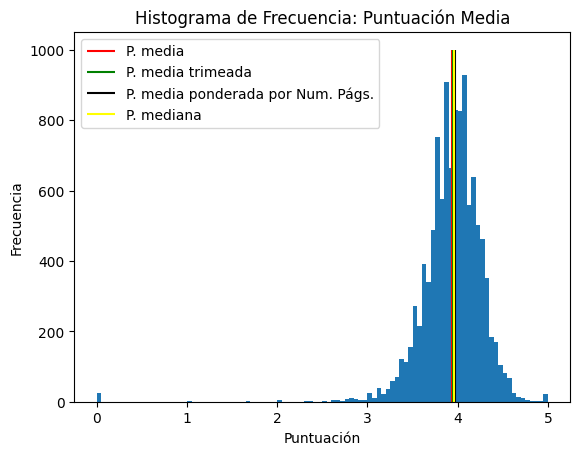

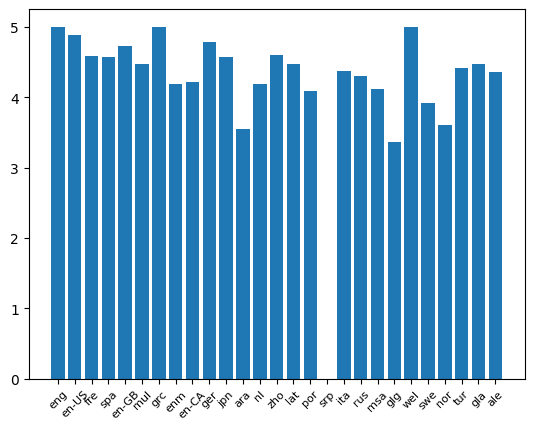

In [ ]:
# Estimando las atasas de población y asesinatos

media_puntuacion = db['average_rating'].mean ()
media_puntuacion_trim = trim_mean (db['average_rating'], 0.1)
media_puntuacion_ponderada = np.average (db['average_rating'], weights = db['  num_pages'])

print (f"Puntuación media: {media_puntuacion}")
print (f"Puntuación media trimeada: {media_puntuacion_trim}")
print (f"Puntuación media ponderada por número de páginas: {media_puntuacion_ponderada}")

# La puntuación media es 3.93. Cuando se recorte el 10% de valores más bajos y altos, la media queda de 3.95.
# La media ponderada calcula la puntuación media, pero cada puntuación pesa más o menos según el número de páginas del libros.
# Así los libros con más páginas pesan más que los que menos tienen.

plt.figure (1)
plt.hist (db['average_rating'], bins=100)
plt.xlabel ("Puntuación")
plt.ylabel ("Frecuencia")
plt.title ("Histograma de Frecuencia: Puntuación Media")
plt.vlines (media_puntuacion, 0, 1000, color = "red", label = "P. media")
plt.vlines (media_puntuacion_trim, 0, 1000, color = "green", label = "P. media trimeada")
plt.vlines (media_puntuacion_ponderada, 0, 1000, color = "black", label = "P. media ponderada por Num. Págs.")
plt.vlines (db['average_rating'].median (), 0, 1000, color = "yellow", label = "P. mediana")
plt.legend ()
plt.show ()

# La mediana es mayor que la media, por lo que es una distribución sesgada hacia la izquierda.

plt.figure (2)
plt.bar (db['language_code'], db['average_rating'])
plt.xticks (rotation = 45, fontsize = 8)
plt.show ()

# Los idiomas con la puntuación media más alta son los libros en: griego, galés e inglés. Los idiomas con puntuación media menor son: arabe, gallego, noruego.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packa

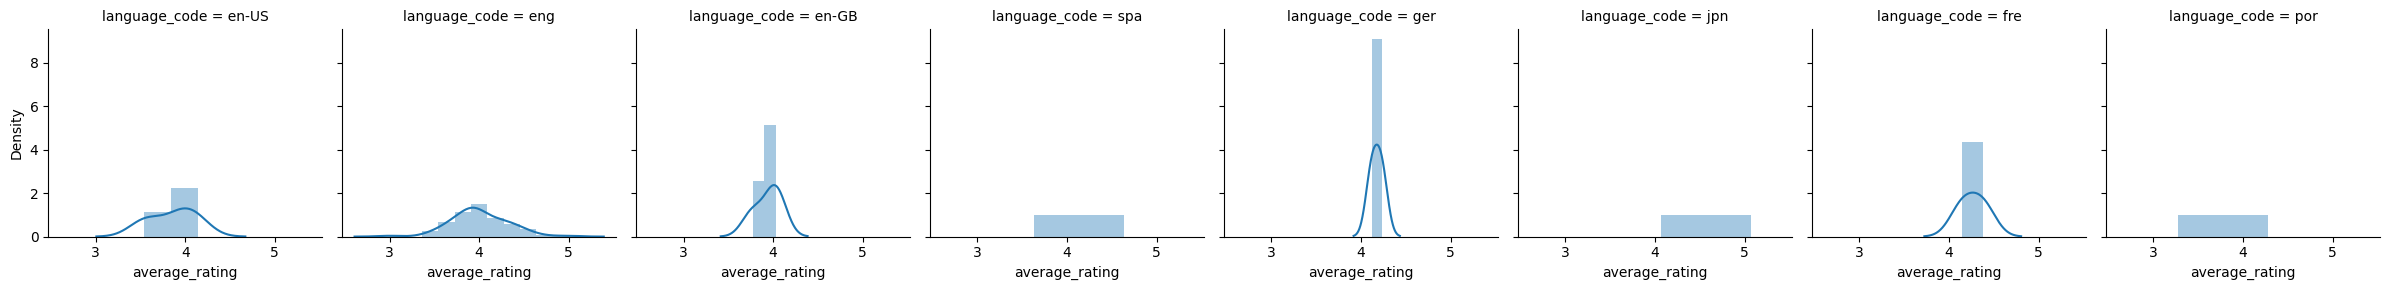

In [ ]:
analisis = db.sample (100)
g = sns.FacetGrid (analisis, col = "language_code")
g.map (sns.distplot, "average_rating")

# Las distribuciones de las puntuaciones medias depende del lenguaje del libro. Por ejemplo, basado en 100 muestras, se tiene que:
# - El alemás, el francés y el inglés presentan distribuciones simétricas.
# - El inglés británica tiene una distribución levemente sesgada a la izquierda.
# - Idiomas como el español o el japonés presentan una pasabanda en un amplio rango de puntuacines: son cuadrados en su distribución.

## Variabilidad

In [ ]:
print ("Número de páginas")
print (f"Media: {db['  num_pages'].mean ():0.2f}")
print (f"Mediana: {db['  num_pages'].median ():0.2f}")
print (f"Desviación estándar: {db['  num_pages'].std ():0.2f}")
print ()
print ("Calificación media")
print (f"Media: {db['average_rating'].mean ():0.2f}")
print (f"Mediana: {db['average_rating'].median ():0.2f}")
print (f"Desviación estándar: {db['average_rating'].std ():0.2f}")

print ()
print ("Calificación mecia de cada lenguaje")
agrupar_max = db.groupby (["language_code"])['average_rating'].mean ()
print (agrupar_max)

print ()
print (f"IQR de la calificación media: {db['average_rating'].quantile(0.75):0.4f} - {db['average_rating'].quantile(0.25):0.4f} = {(db['average_rating'].quantile(0.75)-db['average_rating'].quantile(0.25)):0.4f}")

print ()
print (f"MAD de la calificación media: {robust.scale.mad(db['average_rating']):0.4f}")

# La distribución de los números de páginas tiene un sesgo a la derecha.
# La distribución de la calificación media de los liros tiene un sesgo a la izquierda.
# La variabilidad entre el número de páginas es mayor que el de la calificación media.
# N. Páginas = 336 +- 241.  Calificación media = 3.93 +- 0.35.

# El idioma con la mayor puntuación media es el galés. El idioma con la menor puntuación media es el serbio.

# El 25% de las puntuaciones medias son por encima de 4.14, y el 25% por debajo de 3.7. El 50% de los datos varía entre ese 0.37 de diferencia.

# La mediana de las desviaciones absolutas de la mediana de los datos (MAD) es 0.26.

Número de páginas
Media: 336.41
Mediana: 299.00
Desviación estándar: 241.15

Calificación media
Media: 3.93
Mediana: 3.96
Desviación estándar: 0.35

Calificación mecia de cada lenguaje
language_code
ale      4.360000
ara      3.550000
en-CA    4.025714
en-GB    3.923411
en-US    3.914659
eng      3.934062
enm      3.873333
fre      3.971528
ger      3.950101
gla      4.470000
glg      3.360000
grc      3.707273
ita      4.078000
jpn      4.268696
lat      4.353333
msa      4.110000
mul      4.126316
nl       4.180000
nor      3.600000
por      3.945000
rus      4.255000
spa      3.929312
srp      0.000000
swe      3.455000
tur      4.420000
wel      5.000000
zho      4.456429
Name: average_rating, dtype: float64

IQR de la calificación media: 4.1400 - 3.7700 = 0.3700

MAD de la calificación media: 0.2669


Cuartiles de puntuaciones medias
0.00    0.00
0.25    3.77
0.50    3.96
0.75    4.14
1.00    5.00
Name: average_rating, dtype: float64



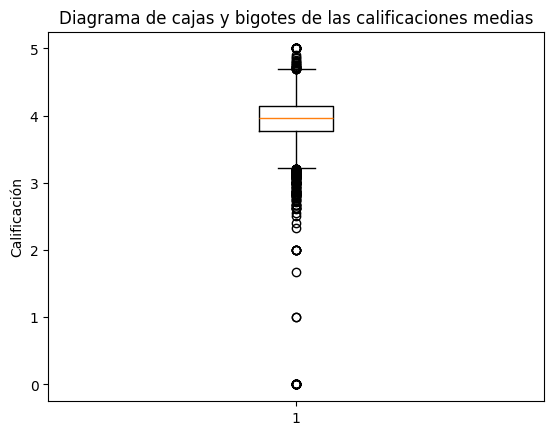


Segmentación de datos
average_rating
(3.5, 4.0]       5597
(4.0, 4.5]       4546
(3.0, 3.5]        688
(4.5, 5.0]        189
(2.5, 3.0]         66
(-0.005, 0.5]      25
(1.5, 2.0]          7
(2.0, 2.5]          3
(0.5, 1.0]          2
(1.0, 1.5]          0
Name: count, dtype: int64


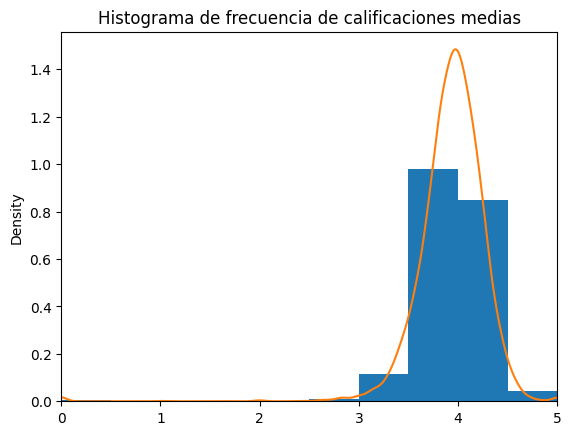

In [ ]:
# Gráficas

print ("Cuartiles de puntuaciones medias")
print (db['average_rating'].quantile ([0, 0.25, 0.5, 0.75, 1]))
print ()

plt.figure (1)
plt.boxplot (db['average_rating'])
plt.title ("Diagrama de cajas y bigotes de las calificaciones medias")
plt.ylabel ("Calificación")
plt.show ()

print ()
print ("Segmentación de datos")
bins = pd.cut(db['average_rating'], 10)
print (bins.value_counts())

plt.figure (2)
plt.hist (db['average_rating'], density = True)
db['average_rating'].plot.density()
plt.title ("Histograma de frecuencia de calificaciones medias")
plt.xlim ([0, 5])
plt.show ()

# Los datos atípicos inferiores a Q1-1.5*RIC tienen mayor varaición de que los Q3+1.5*RIC.

Responder.
1. Calcule las mismas métricas en su propio dataset.
2. Responda las siguientes preguntas.
Sobre Estimaciones de variabilidad

a). Qué significa que la desviación estándar es casi dos veces mayor que la MAD?

Significa que los datos presentan mucha variabilidad en sus extremos, por ejemplo debido a outliers.

b). Cómo puedo mejorar esta situación?

Eliminar los outliers.

c). Explique el resultado obtenido al calcular IQR Sobre exploración en distribución de datos

Es donde se situa el 50% de datos de homicidios. Se visualiza como la resta del límite superior e inferior de la caja en el diagrama de cajas y bigotes.

d) Qué información nos suministra los percentiles de tasa de homicidios por estados?

Para cada percentil n, muestra el n% de los datos menores al percentil

e) Explique con sus propias palabras qué información suministra el diagrama de caja con respecto a la tasa de homicidios por estado.

EL rango Q3+1.5\*RIC tiene más datos que el rango Q1-1.5*RIC. Los valores atípicos se presenten sobre todo por encima de Q3.

f) Cómo podría agregarse los estados que se encuentran en cada uno de los intervalos? Si no sabe la respuesta, complete la tabla de forma manual y postee su respuesta. Interprete los resultados obtenidos. Explique el resultado obtenido por el diagrama de dispersión.

Muestra la dispersión de cada percentil dividida en 4 partes: rojo (< 0.05), azul (< 0.25), verde (< 0.75) y naranja (< 0.95). Se ve que la mayor cantidad de datos son los azules y los verdes.


In [3]:
data = pd.read_csv ("/content/drive/MyDrive/UNAB/Fundamentos de Ciencia de Datos/state.csv")

Percentiles:
0.05    1.600
0.25    2.425
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64



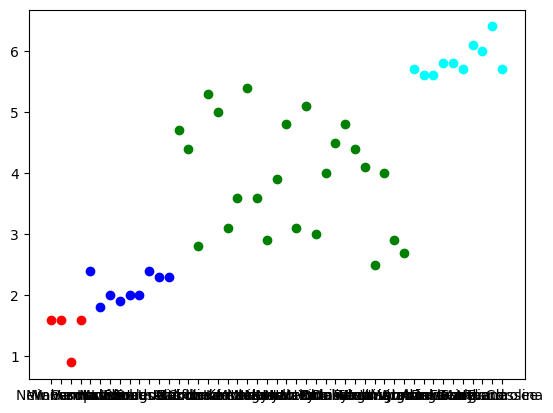

In [23]:
# Calcular percentiles de la tasa de homicidios por estado

print ("Percentiles:")
percentiles = data["Murder.Rate"].quantile([0.05,0.25,0.75,0.95]);
print (percentiles)
print ()

def agrupar_estados (percentiles):
    ya = set()
    plt.figure (1)
    colores = ["red", "blue", "green", "cyan", "orange"]
    for index, percentil in enumerate (percentiles):
        posicion = data["Murder.Rate"] <= percentil
        datos = data.loc[posicion]

        for estado, homicidios in zip (datos["State"], datos["Murder.Rate"]):
            if estado in ya:
                continue
            plt.scatter (estado, homicidios, color = colores[index])
            ya.add (estado)

agrupar_estados (percentiles)